Data Set

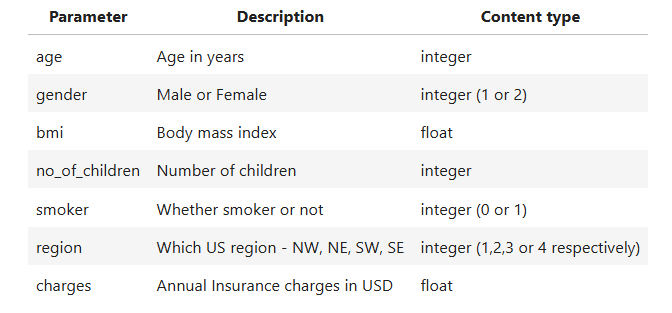

###Objectives

- Load the data as a pandas dataframe
- Clean the data, taking care of the blank entries
- Run exploratory data analysis and identify the attributes that most affect the charges
- Develop single variable and multi variable
- Linear Regression models for predicting the charges
- Use Ridge regression to refine the performance of Linear regression models.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
column=['age','gender','BMI','no_of_children','smoker','region','charges']
df=pd.read_csv(filepath,names=column)
df.head()

,age,gender,BMI,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [ ]:
df.replace('?',np.nan,inplace=True)

#Data Wrangling

In [ ]:
#identify the columns that have some 'Null' (or NaN) information.
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

#Age column has 4 missing values
#Smoker column has 7 missing values

In [ ]:
#For continuous attributes (e.g., age), replace missing values with the mean.
avg_age=df['age'].astype(float).mean(axis=0)
print('Mean value for age: ',avg_age)
df['age']=df['age'].replace(np.nan,avg_age)

Mean value for age:  39.10982658959538


In [ ]:
#For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
frequency_smoker=df['smoker'].value_counts().idxmax()
df['smoker']=df['smoker'].replace(np.nan,frequency_smoker)

In [ ]:
#Update the data types of the respective columns.
df[['age','smoker']].dtypes
df[['age','smoker']]=df[['age','smoker']].astype(int)

In [ ]:
#Update the charges column such that all values are rounded to nearest 2 decimal places.
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     BMI  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


#Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for charges with respect to bmi

(0.0, 54.9885)

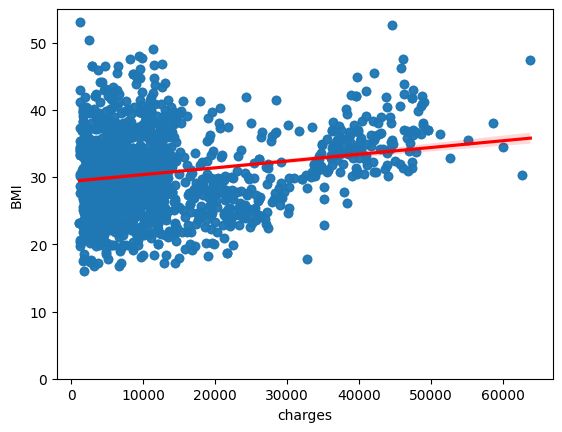

In [ ]:
sns.regplot(x='charges',y='BMI',data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

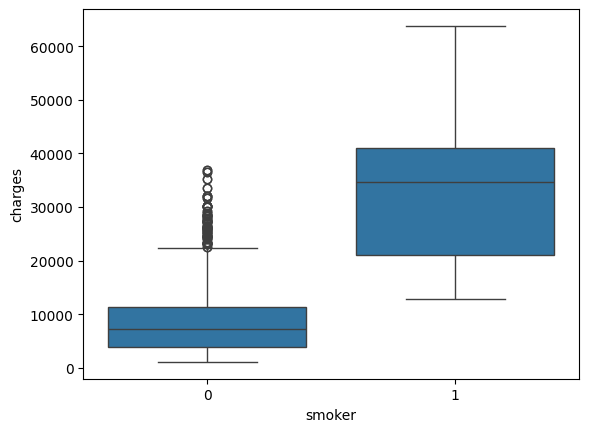

In [ ]:
#Implement the box plot for charges with respect to smoker.
sns.boxplot(x='smoker',y='charges',data=df)

In [ ]:
#Print the correlation matrix for the dataset.
print(df.corr())

                     age    gender       BMI  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
BMI             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
BMI             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


##Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the charges. We have narrowed it down to the following variables:

Continuous numerical variables: age

Categorical variables: smoker

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

#Task 4 : Model Development
##Linear Regression
Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the
 R^2 score of this model.

In [ ]:
lr=LinearRegression()
X=df[['smoker']]
Y=df['charges']
lr.fit(X,Y)
print('The R-square is: ',lr.score(X,Y))
Yhat=lr.predict(X)
mse = mean_squared_error(df['charges'], Yhat)
print('The mean square error of charges and predicted value is: ', mse)

The R-square is:  0.6221791733924185
The mean square error of charges and predicted value is:  55770970.49293007


## Multiple Linear Regression
Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the
 score of this model. You should see an improvement in the performance.

In [ ]:
Z=df[['age','BMI','no_of_children','gender','region','smoker']]
Y=df['charges']
lr=LinearRegression()
lr.fit(Z,Y)
print('The R-square is: ', lr.score(Z, df['charges']))
Y_predict_multifit = lr.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['charges'], Y_predict_multifit))

The R-square is:  0.7504083820289634
The mean square error of price and predicted value using multifit is:  36842772.50180054


##Pipeline

Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  22841865.842027858
R^2 for multi-variable polynomial pipeline is:  0.8452576213500093


#Task 5 : Model Refinement
Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [ ]:
z_train,z_test,y_train,y_test=train_test_split(Z,Y,test_size=0.2,random_state=1)

Initialize a Ridge regressor that used hyperparameter alfa=0.1. Fit the model using training data data subset. Print the
 R^2 score for the testing data.

In [ ]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(z_train, y_train)
yhat = RidgeModel.predict(z_test)
print(r2_score(y_test,yhat))

0.6760807731582404


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the
R^2 score for the testing subset.

In [ ]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(z_train)
x_test_pr = pr.fit_transform(z_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608145
